In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import math as m
import statsmodels.formula.api as sfa
import statsmodels.api as sma
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder,StandardScaler
le= LabelEncoder()
mmax= MinMaxScaler()
ohe = OneHotEncoder()
sc= StandardScaler()
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import ElasticNet,Lasso,Ridge,LinearRegression,SGDRegressor
lr = LinearRegression()
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor()
from sklearn.model_selection import KFold, cross_val_score

# ABOUT THE DATA  AND THE PROBELM

The data given in the problem is regarding loan status, i.e. The loan will be approved by the bank for a particular application or not.
There are several types of information collected namely –

Loan ID, Gender, Marital Status, Dependants, Education Status, Self-employment status, Applicant income, Co applicant income, Loan Amount, Loan amount term credit history.

On the basis of several information collected under these heads, the bank will decide that particular application will be provided with credit facilities or not.

We have tried to find out the best model which is fairly accurate in predicting weather Loan for a particular Loan Application will be Approved or not.

# DATA IMPORT

In [98]:
train= pd.read_csv(r"D:\Jupyter Notebook\datasets\Banking Datasets\Loan Prediction\test_lAUu6dG.csv")
test= pd.read_csv(r"D:\Jupyter Notebook\datasets\Banking Datasets\Loan Prediction\train_ctrUa4K.csv")

In [99]:
df = pd.concat([train,test],ignore_index=True)

In [100]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,NaN
1,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,NaN
2,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,NaN
3,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,NaN,Urban,NaN
4,LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban,NaN


In [101]:
df.shape

(981, 13)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


In [103]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [104]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,NaN
1,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,NaN
2,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,NaN
3,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,NaN,Urban,NaN
4,LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban,NaN


In [105]:
df.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [106]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# UNIVARIATE ANALYSIS

In [107]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,NaN
1,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,NaN
2,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,NaN
3,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,NaN,Urban,NaN
4,LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban,NaN


In [108]:
df.select_dtypes(include= np.number).columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [109]:
df.select_dtypes(include= 'object').columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [110]:
df=df.drop('Loan_ID',axis=1)

In [111]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,NaN
1,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,NaN
2,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,NaN
3,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,NaN,Urban,NaN
4,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban,NaN


In [112]:
numcols=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']
catcols= ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status']

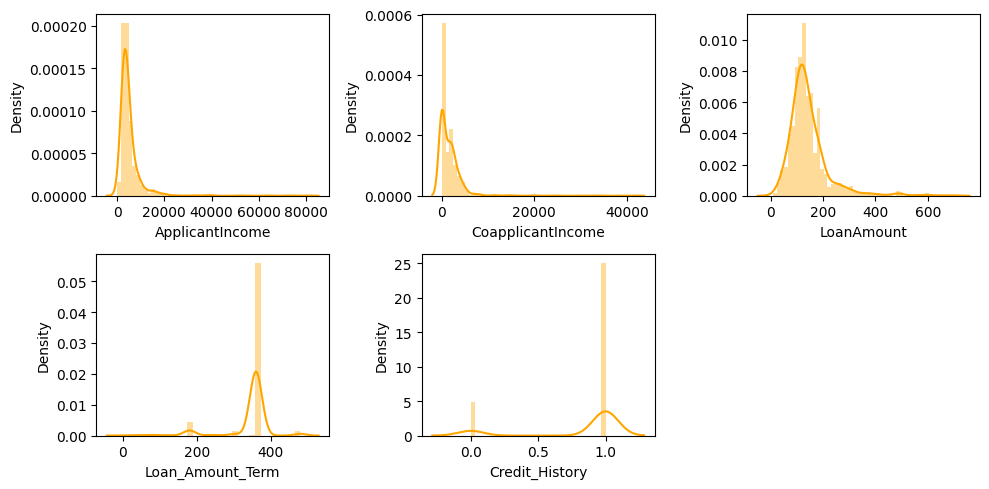

In [113]:
nrows=2
ncols=3
rep=1

plt.figure(figsize=(10,5))
for i in numcols:
    plt.subplot(nrows,ncols,rep)
    sns.distplot(df.loc[:,i],color='orange')
    rep+=1
    
plt.tight_layout()
plt.show()

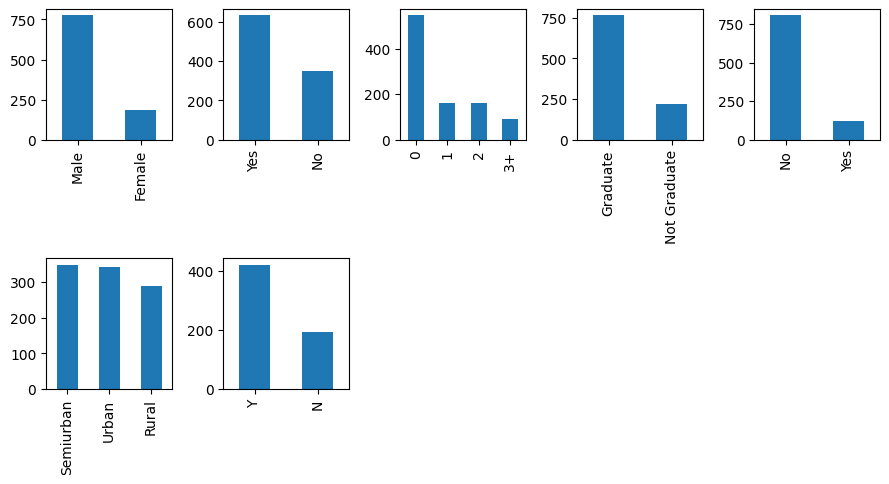

In [114]:
# CAT COLS

nrows=2
ncols=5
rep=1

plt.figure(figsize=(9,5))
for i in catcols:
    plt.subplot(nrows,ncols,rep)
    df.loc[:,i].value_counts().plot(kind='bar')
    plt.xticks(rotation=90)
    rep+=1
    
plt.tight_layout()
plt.show()

In [115]:
# TARGET VARIABLE

Text(0.5, 0, 'Loan_Status')

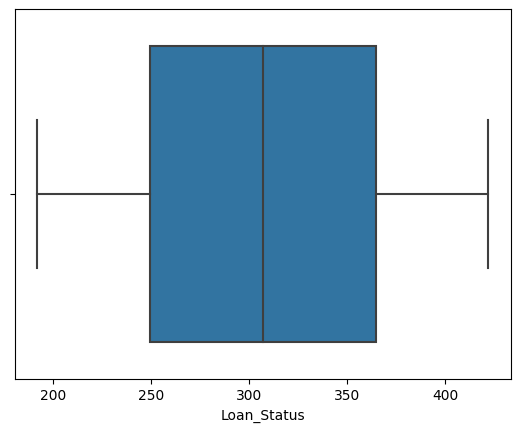

In [116]:
sns.boxplot(data=df, x= df.Loan_Status.value_counts())
plt.xlabel('Loan_Status')

# BIVARIATE ANALYSIS

In [117]:
numcols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

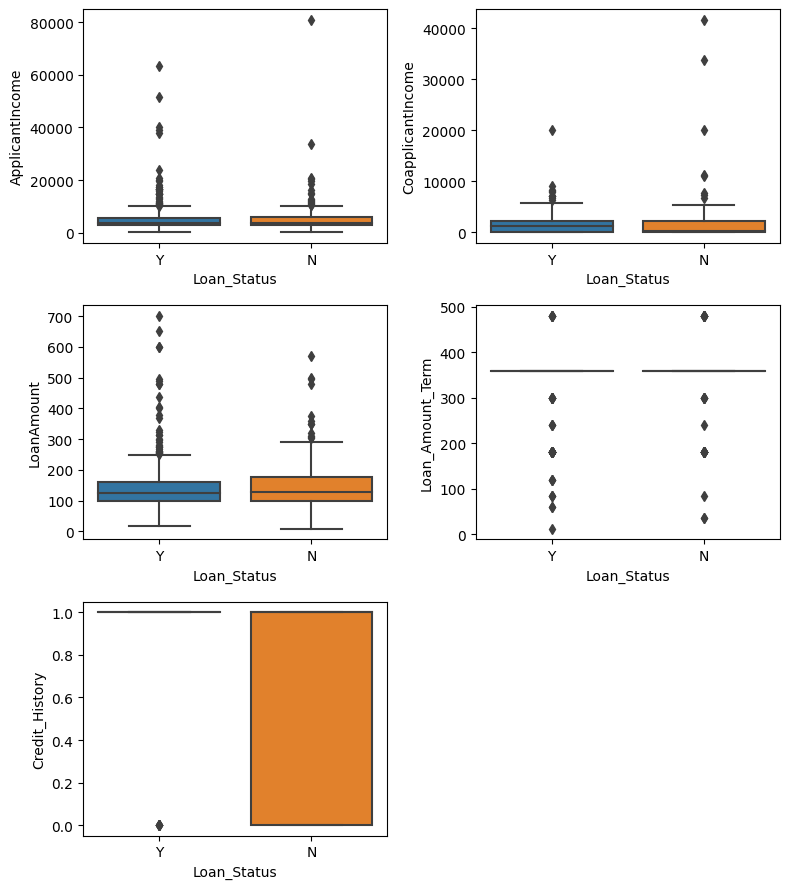

In [118]:
# Num Cols


nrows=3
ncols=2
rep=1

plt.figure(figsize=(8,9))
for i in numcols:
    plt.subplot(nrows,ncols,rep)
    sns.boxplot(data=df, y=i, x= df.Loan_Status,orient='v')
    rep+=1
    
plt.tight_layout()
plt.show()

In [119]:
# Null Value Treatment
df.isnull().sum()

Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [120]:
df.Gender.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
976    False
977    False
978    False
979    False
980    False
Name: Gender, Length: 981, dtype: bool

In [121]:
df.Gender.mode()

0    Male
Name: Gender, dtype: object

In [122]:
df.loc[df['Gender'].isnull(),'Gender']='Male'

In [123]:
df.Married.mode()

0    Yes
Name: Married, dtype: object

In [124]:
df.loc[df['Married'].isnull(),'Married']='Yes'

In [125]:
df.Married.isnull().sum()

0

In [126]:
df.Dependents.mode()

0    0
Name: Dependents, dtype: object

In [127]:
df.loc[df.Dependents.isnull(),'Dependents']=0

In [128]:
df.Dependents.isnull().sum()

0

In [129]:
# Null Value Treatment
df.isnull().sum()

Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [130]:
df[df.Self_Employed.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
8,Male,Yes,2,Graduate,NaN,13633,0.0,280.0,240.0,1.0,Urban,NaN
11,Male,Yes,1,Graduate,NaN,2185,1516.0,162.0,360.0,1.0,Semiurban,NaN
13,Male,Yes,2,Graduate,NaN,12173,0.0,166.0,360.0,0.0,Semiurban,NaN
36,Male,Yes,2,Graduate,NaN,7350,4029.0,185.0,180.0,1.0,Urban,NaN
72,Male,Yes,1,Graduate,NaN,4083,1775.0,139.0,60.0,1.0,Urban,NaN
89,Female,No,0,Graduate,NaN,5058,0.0,200.0,360.0,1.0,Rural,NaN
142,Male,Yes,3+,Not Graduate,NaN,6794,528.0,139.0,360.0,0.0,Urban,NaN
161,Male,No,0,Graduate,NaN,2964,0.0,84.0,360.0,0.0,Semiurban,NaN
168,Female,Yes,3+,Graduate,NaN,1750,2935.0,94.0,360.0,0.0,Semiurban,NaN
175,Male,Yes,2,Graduate,NaN,4912,4614.0,160.0,360.0,1.0,Rural,NaN


In [131]:
df['Self_Employed'].mode()[0]

'No'

In [132]:
df.loc[df.Self_Employed.isnull(),'Self_Employed']='No'

In [133]:
df.Self_Employed.isnull().sum()

0

In [134]:
# Null Value Treatment
df.isnull().sum()

Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [135]:
df.LoanAmount.mode()

0    120.0
Name: LoanAmount, dtype: float64

In [136]:
df.loc[df.LoanAmount.isnull(),'LoanAmount']=120.0

In [137]:
df.LoanAmount.isnull().sum()

0

In [138]:
df.Loan_Amount_Term.mode()

0    360.0
Name: Loan_Amount_Term, dtype: float64

In [139]:
df.loc[df.Loan_Amount_Term.isnull(),'Loan_Amount_Term']=360

In [140]:
df.isnull().sum()

Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [141]:
df.Loan_Status.mode()

0    Y
Name: Loan_Status, dtype: object

In [142]:
df.Credit_History.mode()

0    1.0
Name: Credit_History, dtype: float64

In [143]:
df.loc[df.Loan_Status.isnull(),'Loan_Status']='Y'

In [144]:
df.loc[df.Credit_History.isnull(),'Credit_History']=1.0

In [145]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [146]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,Y
2,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,Y
3,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,1.0,Urban,Y
4,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
976,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
977,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
978,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
979,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# OUTLIER TREATMENT

In [147]:
numcols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

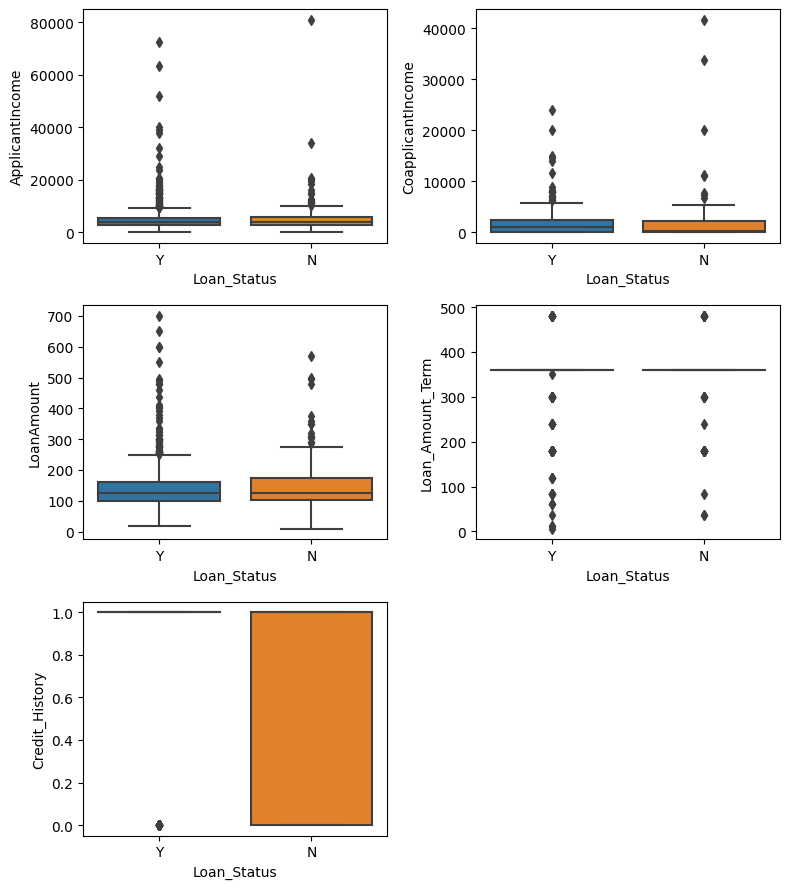

In [148]:
nrows=3
ncols=2
rep=1

plt.figure(figsize=(8,9))
for i in numcols:
    plt.subplot(nrows,ncols,rep)
    sns.boxplot(data=df, y=i, x= df.Loan_Status,orient='v')
    rep+=1
    
plt.tight_layout()
plt.show()

In [149]:
df.ApplicantIncome.sort_values(ascending=False).head()

776    81000
81     72529
700    63337
538    51763
522    39999
Name: ApplicantIncome, dtype: int64

In [150]:
df.sort_values(by=["ApplicantIncome"],ascending=False).head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
776,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N
81,Male,Yes,3+,Graduate,No,72529,0.0,360.0,360.0,1.0,Urban,Y
700,Male,Yes,0,Graduate,No,63337,0.0,490.0,180.0,1.0,Urban,Y
538,Male,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
522,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y


In [151]:
df.sort_values(by=["LoanAmount"],ascending=False).head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
538,Male,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
497,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,1.0,Urban,Y
522,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
928,Female,Yes,1,Graduate,Yes,19484,0.0,600.0,360.0,1.0,Semiurban,Y
736,Male,Yes,0,Graduate,No,19730,5266.0,570.0,360.0,1.0,Rural,N


In [152]:
df.sort_values(by=["Loan_Amount_Term"],ascending=False).head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
660,Female,No,0,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
535,Male,No,0,Graduate,No,2237,0.0,63.0,480.0,0.0,Semiurban,N
745,Male,No,0,Graduate,No,3069,0.0,71.0,480.0,1.0,Urban,N
497,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,1.0,Urban,Y
940,Male,Yes,2,Not Graduate,No,6125,1625.0,187.0,480.0,1.0,Semiurban,N


In [153]:
df.sort_values(by=["Credit_History"],ascending=False).head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,Y
645,Male,Yes,0,Graduate,No,14583,0.0,436.0,360.0,1.0,Semiurban,Y
615,Male,Yes,1,Graduate,No,2882,1843.0,123.0,480.0,1.0,Semiurban,Y
616,Male,Yes,0,Graduate,No,1809,1868.0,90.0,360.0,1.0,Urban,Y
618,Female,No,2,Graduate,No,3427,0.0,138.0,360.0,1.0,Urban,N


# ENCODING

In [154]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,Y
2,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,Y
3,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,1.0,Urban,Y
4,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban,Y


In [155]:
df.select_dtypes(include='object').columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [156]:
catcols1=['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [157]:
catcols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [158]:
df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

In [159]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,0,0,0,5720,0.0,110.0,360.0,1.0,2,1
1,1,1,1,0,0,3076,1500.0,126.0,360.0,1.0,2,1
2,1,1,2,0,0,5000,1800.0,208.0,360.0,1.0,2,1
3,1,1,2,0,0,2340,2546.0,100.0,360.0,1.0,2,1
4,1,0,0,1,0,3276,0.0,78.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
976,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
977,1,1,3+,0,0,4106,0.0,40.0,180.0,1.0,0,1
978,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
979,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [160]:
df.Dependents= df.Dependents.str.replace('+','')

In [161]:
df.Dependents = le.fit_transform(df.Dependents)

In [162]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,0,0,0,5720,0.0,110.0,360.0,1.0,2,1
1,1,1,1,0,0,3076,1500.0,126.0,360.0,1.0,2,1
2,1,1,2,0,0,5000,1800.0,208.0,360.0,1.0,2,1
3,1,1,2,0,0,2340,2546.0,100.0,360.0,1.0,2,1
4,1,0,0,1,0,3276,0.0,78.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
976,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
977,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
978,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
979,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


<Axes: >

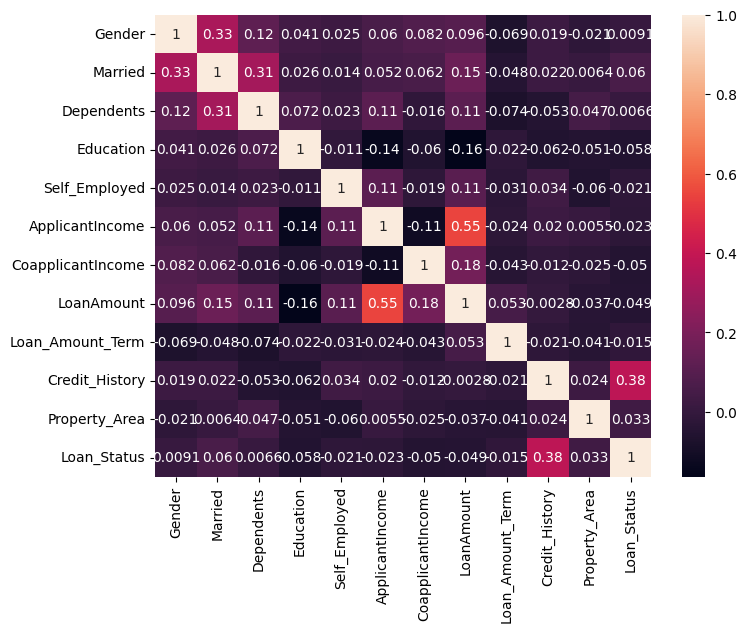

In [163]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)

# BUILDING THE MODEL AND TRAINING AND TESTING

In [164]:
# TRAIN TEST SPLIT

In [165]:
X = df.drop('Loan_Status',axis=1)
y= df.Loan_Status

xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.20,random_state=0)
xtrain_c = sma.add_constant(xtrain)
xtest_c= sma.add_constant(xtest)

In [166]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [167]:
# VIF

vif = [variance_inflation_factor(xtrain_c.values,i) for i in range(xtrain_c.shape[1])]
pd.DataFrame({'VIF':vif},xtrain_c.columns)

,VIF
const,47.118678
Gender,1.161793
Married,1.259568
Dependents,1.116549
Education,1.052087
Self_Employed,1.028058
ApplicantIncome,1.579555
CoapplicantIncome,1.139210
LoanAmount,1.642667
Loan_Amount_Term,1.022175


In [190]:
m1 = sma.Logit(ytrain,xtrain).fit()

Optimization terminated successfully.
         Current function value: 0.428762
         Iterations 6


In [191]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Loan_Status   No. Observations:                  784
Model:                          Logit   Df Residuals:                      773
Method:                           MLE   Df Model:                           10
Date:                Thu, 28 Sep 2023   Pseudo R-squ.:                  0.1216
Time:                        09:46:50   Log-Likelihood:                -336.15
converged:                       True   LL-Null:                       -382.70
Covariance Type:            nonrobust   LLR p-value:                 1.294e-15
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Gender               -0.0789      0.256     -0.308      0.758      -0.581       0.423
Married               0.4644      0.225      2.067      0.039       0.024       0.905
Dependents            0.0137      0.092      0.150      0.881      -0.166       0.193
Education            -0.3358      0.234     -1.437      0.151      -0.794       0.122
Self_Employed        -0.2800      0.290     -0.966      0.334      -0.848       0.288
ApplicantIncome    7.614e-06    2.5e-05      0.305      0.761   -4.14e-05    5.66e-05
CoapplicantIncome -3.229e-05   3.89e-05     -0.829      0.407      -0.000     4.4e-05
LoanAmount           -0.0026      0.002     -1.648      0.099      -0.006       0.000
Loan_Amount_Term      0.0003      0.001      0.395      0.693      -0.001       0.002
Credit_History        1.9860      0.216      9.178      0.000       1.562       2.410
Property_Area         0.0452      0.119      0.379      0.705      -0.189       0.279
=====================================================================================
"""

In [194]:
ypred_test= m1.predict(xtest)

In [198]:
ypred = [0 if i<0.5 else 1 for i in ypred_test]

In [206]:
def allmat1(model,test,predd):
    accuracy = accuracy_score(test,predd)
    precision= precision_score(test,predd)
    f1= f1_score(test,predd)
    recall= recall_score(test,predd)
    
    print('Accuracy:',accuracy,
         'Precision:',precision,
         'F1 Score:',f1,
         'recall:',recall)

In [207]:
allmat1(model=m1,test=ytest,predd=ypred)

Accuracy: 0.8020304568527918 Precision: 0.8222222222222222 F1 Score: 0.8835820895522387 recall: 0.9548387096774194


## Inferences for M1

* Model is giving an accuracy score of 80% means it is fairly accurate.
* 82% precision score means the model is 82% accurate and correctly predicted the class labels for 82% of the instances in the dataset. But still it lacks 18% of accuracy.
* 88.35% F1 score is a very high number this means that the model is precise and is able to avoid the false positives and false negatives most of the time.
* Model is having a 95% of recall score which means that it is good at identifying the true positive cases in the data also that reduces the risk who are very large extent of giving false negative results.
* We have to try with some other model in order to get a better fitted model.

In [210]:
m2 = lr.fit(xtrain,ytrain)

In [212]:
ypred_prob= m2.predict(xtest)

In [214]:
ypred= [0 if i<0.5 else 1 for i in ypred_prob]

In [176]:
import statistics as stats
import scipy.stats as sts

In [216]:
allmat2(model=m2,test=ytest,predd=ypred,estimator=m2,X=xtest)

Accuracy: 0.8071065989847716 Precision: 0.8305084745762712 F1 Score: 0.8855421686746989 recall: 0.9483870967741935 cross validation: 0.03160498264009022


## Inferences of m2

* Model is giving an accuracy score of 80% means it is fairly accurate.
* 83% precision score means the model is 83% accurate and correctly predicted the class labels for 83% of the instances in the dataset. But still it lacks 17% of accuracy and is minorly better to the previous model.
* 88.35% F1 score is a very high number this means that the model is precise and is able to avoid the false positives and false negatives most of the time.
* Model is having a 95% of recall score which means that it is good at identifying the true positive cases in the data also that reduces the risk who are very large extent of giving false negative results.
* However the crossvalidation score for the same is very less around 3% so it is not fit for applying to this data is not good.
* Model can be further improved in order to get a better fit.

# NON LINEAR MODELS

In [180]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [181]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,cohen_kappa_score

In [182]:
from sklearn.model_selection import cross_val_score

In [183]:
rfc = RandomForestClassifier(criterion='entropy')

In [184]:
m3= rfc.fit(xtrain,ytrain)

In [185]:
ypred_rf = m3.predict(xtest)

In [186]:
ypred_prob_rf = m3.predict_proba(xtest)[:,1]

In [187]:
def allmat2(model,test,predd,estimator,X):
    accuracy = accuracy_score(test,predd)
    precision= precision_score(test,predd)
    f1= f1_score(test,predd)
    recall= recall_score(test,predd)
    cross_validation = cross_val_score(estimator=estimator,X=X,y=test)
    
    print('Accuracy:',accuracy,
         'Precision:',precision,
         'F1 Score:',f1,
         'recall:',recall,
         'cross validation:',cross_validation.mean())

In [188]:
allmat2(model=m3,test=ytest,predd=ypred_rf,estimator=rfc,X=xtest)

Accuracy: 0.8274111675126904 Precision: 0.8379888268156425 F1 Score: 0.8982035928143713 recall: 0.967741935483871 cross validation: 0.8021794871794873


# Infrences for M3
* As compared to the previous 2 models m3 seems to be performing better and can be considered for further operations for this data.
* As we can see that the model is 83% accurate and can make accurate predictions most of the time. So we can say that this is a good model for the following data.
* Similar to accuracy the model has scored 83.8% around 84% in the precision score, and is a very precise model as per the standards.
* 90% F1 score is a very high number this means that the model is precise and is able to avoid the false positives and false negatives successfully.
* Model is having a 96.77% of recall score which means that it is exceptionally good at identifying the true positive cases in the data also that reduces the risk who are very large extent of giving false negative results.
* Also crossvalidation is 80% which means that in real life scenario to predict bank loan predictions this model is a good fit.
* This indicates that M3 model can be a good fit in order to apply into systems such as bank loan predictions, and weather a person is eligible for providing credit facilities through a bank or not.

# OUTCOMES

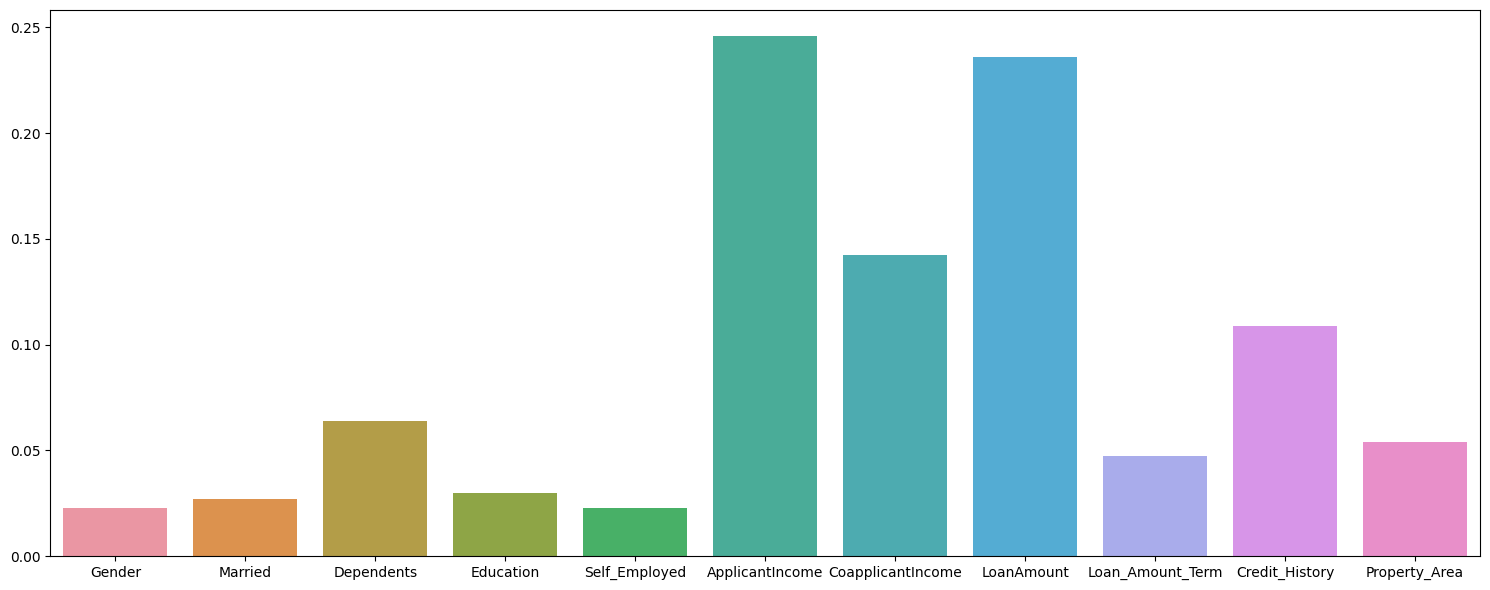

In [189]:
# Feature importance according to the Model 3
plt.figure(figsize=(15,6))
sns.barplot(x = m3.feature_names_in_,y= m3.feature_importances_)
plt.tight_layout()
plt.show()

* According to the model number 3 in the above graph we can see the importance of the various features that are in the data influencing the constant or dependent variable which is Loan Status.

* According to the model 3 applicant income it's the top 4 most important variable in determining that the loan for a particular application will be approved or not are- Applicant Income, Loan Amount,Coapplicant Income and Credit History Respectively.

* Higher the applicant income higher will be the probability of the applicant that he will be able to pay the principal and the interest amount regularly without any default and also there are less chances of customer going NPA.

* Also, the loan amount is an important variable in predicting that the loan will be approved or not. Higher the loan amount higher is the possibility that the loan will get approved by the bank as it will be highly profitable as compared to a lower amount.

* Co applicant income according to the modern 3 is the 3rd highest scoring variable. A good Co applicant income assures that if the customer is not able to pay the loans on time, the Co applicant will be able to comply with the repayment policy as compared to those having a lower income.

* Credit history is also an important variable in determining that the customer will be provided with the loan or not. If the customer is having a good credit history without any payment failure or defaults, it is more likely that the loan will be approved by the bank as compared to those having some issues with their credit history such as payment failure, payment delays, defaults and other repayment related issues.